<a href="https://colab.research.google.com/github/pmagnata-primo/CREA/blob/main/CREA_Application_Magnata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CREA Data Scientist Technical Task - Magnata

## Objective

Using the provided geojson data for air pollution monitoring stations and country boundaries, calculate the density of PM10 monitoring stations per 1,000 square kilometers for each of the following countries: US, UK, Turkey, Thailand, Philippines, and India. Rank the countries by density in descending order and present your results in a simple table, showing:

Country Name

* Country Name
* Number of PM10 Station
* Area (in square kilometers)
* Density of PM10 Stations per 1,000 sq. km

## Setup

In [ ]:
import pandas as pd
import geopandas as gpd
import requests
from google.colab import drive

In [ ]:
url_pm10 = "https://api.energyandcleanair.org/stations?country=GB,US,TR,PH,IN,TH&format=geojson"
response_pm10 = requests.get(url_pm10)
stations = response_pm10.json()

In [ ]:
url_adm = "https://r2.datahub.io/clvyjaryy0000la0cxieg4o8o/main/raw/data/countries.geojson"
response_adm = requests.get(url_adm)
adm = response_adm.json()

In [ ]:
drive.mount('/content/drive')
output_path='/content/drive/MyDrive/Colab Notebooks/Output'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
stations_gdf = gpd.GeoDataFrame.from_features(stations)
adm_gdf = gpd.GeoDataFrame.from_features(adm)

## EDA

In [ ]:
stations_gdf.head()

,geometry,timezone,names,last_scraped_data,pollutants,infos,gadm2_id,city_id,type,id,...,source,last_updated,gadm1_id,gpw,level,first_updated,name,show_in_dashboard,attribution,city_name
0,POINT (-157.96913 21.39283),Pacific/Honolulu,[Pearl City],None,"[pm10, pm25]","{'sources': '', 'isMobile': False, 'isAnalysis...",usa.12.2_1,"pearl city, manana_usa.12_1_us",None,1026,...,openaq,2022-04-06T00:00:00+00:00,usa.12_1,None,station,None,Pearl City,False,,"Pearl City, Manana"
1,POINT (-119.789 39.506),America/Los_Angeles,[Plumb-Kit],None,[pm10],"{'sources': '', 'isMobile': False, 'isAnalysis...",usa.29.16_1,reno_usa.29_1_us,None,1046,...,openaq,2018-01-04T00:00:00+00:00,usa.29_1,None,station,None,Plumb-Kit,False,,Reno
2,POINT (-90.7052 38.4902),America/Chicago,[Pacific],None,[o3],"{'sources': '', 'isMobile': False, 'isAnalysis...",usa.26.95_1,pacific_usa.26_1_us,None,1002,...,openaq,2024-08-24T00:00:00+00:00,usa.26_1,None,station,None,Pacific,False,,Pacific
3,POINT (-118.82303 45.65223),America/Los_Angeles,[Pendleton - McKay Cr],None,[pm25],"{'sources': '', 'isMobile': False, 'isAnalysis...",usa.38.30_1,pendleton_usa.38_1_us,None,1029,...,openaq,2024-08-24T00:00:00+00:00,usa.38_1,None,station,None,Pendleton - McKay Cr,False,,Pendleton
4,POINT (-87.2708 30.3681),America/Chicago,[Pensacola NAS],None,"[o3, pm25]","{'sources': '', 'isMobile': False, 'isAnalysis...",usa.10.16_1,warrington_usa.10_1_us,None,1030,...,openaq,2024-08-24T00:00:00+00:00,usa.10_1,None,station,None,Pensacola NAS,False,,Warrington


In [ ]:
stations_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6104 entries, 0 to 6103
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   geometry           6104 non-null   geometry
 1   timezone           5720 non-null   object  
 2   names              5177 non-null   object  
 3   last_scraped_data  0 non-null      object  
 4   pollutants         6050 non-null   object  
 5   infos              5033 non-null   object  
 6   gadm2_id           5397 non-null   object  
 7   city_id            6104 non-null   object  
 8   type               842 non-null    object  
 9   id                 6104 non-null   object  
 10  country_id         6104 non-null   object  
 11  source             6104 non-null   object  
 12  last_updated       6104 non-null   object  
 13  gadm1_id           5946 non-null   object  
 14  gpw                0 non-null      object  
 15  level              6104 non-null   object  
 16

In [ ]:
stations_gdf=stations_gdf.set_crs(epsg=4326)

In [ ]:
adm_gdf.head()

,geometry,ADMIN,ISO_A3,ISO_A2
0,"MULTIPOLYGON (((-69.99694 12.57758, -69.93639 ...",Aruba,ABW,AW
1,"MULTIPOLYGON (((71.0498 38.40866, 71.05714 38....",Afghanistan,AFG,AF
2,"MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -...",Angola,AGO,AO
3,"MULTIPOLYGON (((-63.03767 18.21296, -63.09952 ...",Anguilla,AIA,AI
4,"MULTIPOLYGON (((19.74777 42.5789, 19.74601 42....",Albania,ALB,AL


In [ ]:
adm_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  255 non-null    geometry
 1   ADMIN     255 non-null    object  
 2   ISO_A3    255 non-null    object  
 3   ISO_A2    255 non-null    object  
dtypes: geometry(1), object(3)
memory usage: 8.1+ KB


<Axes: >

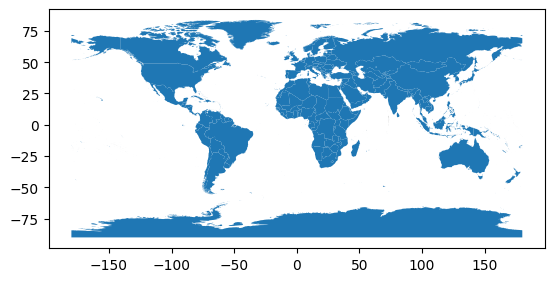

In [ ]:
adm_gdf.plot()

##1. Compute the area of each ADM

In [ ]:
# map is reprojected to EPSG=6933 so that projection is cylindrical and maintains area relationships across the globe
adm_gdf=adm_gdf.set_crs(epsg=4326)
adm_gdf=adm_gdf.to_crs(epsg=6933)
adm_gdf['Area_SQM'] = adm_gdf.geometry.area
adm_gdf['Area_SQKM'] = adm_gdf['Area_SQM']/1e6
adm_gdf=adm_gdf.to_crs(epsg=4326)

In [ ]:
adm_gdf_reduced=adm_gdf[['ADMIN','ISO_A3','Area_SQKM']]
adm_gdf_reduced.head()

,ADMIN,ISO_A3,Area_SQKM
0,Aruba,ABW,1.697662e+02
1,Afghanistan,AFG,6.421811e+05
2,Angola,AGO,1.244652e+06
3,Anguilla,AIA,8.067611e+01
4,Albania,ALB,2.833579e+04


## 2. Spatially Join the Datasets

In [ ]:
pm10_full=gpd.sjoin(stations_gdf, adm_gdf, how="inner", predicate="within")

In [ ]:
pm10_full.head()

,geometry,timezone,names,last_scraped_data,pollutants,infos,gadm2_id,city_id,type,id,...,name,show_in_dashboard,attribution,city_name,index_right,ADMIN,ISO_A3,ISO_A2,Area_SQM,Area_SQKM
0,POINT (-157.96913 21.39283),Pacific/Honolulu,[Pearl City],None,"[pm10, pm25]","{'sources': '', 'isMobile': False, 'isAnalysis...",usa.12.2_1,"pearl city, manana_usa.12_1_us",None,1026,...,Pearl City,False,,"Pearl City, Manana",238,United States of America,USA,US,9.464444e+12,9.464444e+06
1,POINT (-119.789 39.506),America/Los_Angeles,[Plumb-Kit],None,[pm10],"{'sources': '', 'isMobile': False, 'isAnalysis...",usa.29.16_1,reno_usa.29_1_us,None,1046,...,Plumb-Kit,False,,Reno,238,United States of America,USA,US,9.464444e+12,9.464444e+06
2,POINT (-90.7052 38.4902),America/Chicago,[Pacific],None,[o3],"{'sources': '', 'isMobile': False, 'isAnalysis...",usa.26.95_1,pacific_usa.26_1_us,None,1002,...,Pacific,False,,Pacific,238,United States of America,USA,US,9.464444e+12,9.464444e+06
3,POINT (-118.82303 45.65223),America/Los_Angeles,[Pendleton - McKay Cr],None,[pm25],"{'sources': '', 'isMobile': False, 'isAnalysis...",usa.38.30_1,pendleton_usa.38_1_us,None,1029,...,Pendleton - McKay Cr,False,,Pendleton,238,United States of America,USA,US,9.464444e+12,9.464444e+06
4,POINT (-87.2708 30.3681),America/Chicago,[Pensacola NAS],None,"[o3, pm25]","{'sources': '', 'isMobile': False, 'isAnalysis...",usa.10.16_1,warrington_usa.10_1_us,None,1030,...,Pensacola NAS,False,,Warrington,238,United States of America,USA,US,9.464444e+12,9.464444e+06


## 3. Spatial Analysis

In [ ]:
# Get number of PM10 Stations by Country
df=pd.DataFrame(pm10_full.groupby(['ADMIN','ISO_A3'])['id'].count()).reset_index()

# Merge area_gdf_reduced dataframe for area of countries
df_full=pd.merge(df, adm_gdf_reduced, on=['ADMIN','ISO_A3'])

# Get density of PM10 stations by country
df_full['Density of PM10 Stations per 1,000 sq. km']=(df_full['id']/df_full['Area_SQKM'])*1000


In [ ]:
# Rename columns
df_full=df_full.rename(columns={'ADMIN':'Country Name', 'id':'Number of PM10 Stations', 'Area_SQKM':'Area (in square kilometers)'})

# Filter for only relevant countries
df_final=df_full[df_full['ISO_A3'].isin(['USA', 'GBR', 'TUR', 'THA', 'PHL', 'IND'])]

# Keep only relevant columns
df_final=df_final[['Country Name', 'Number of PM10 Stations', 'Area (in square kilometers)', 'Density of PM10 Stations per 1,000 sq. km']]

# Sort values by density of PM10 stations per 1000 sq. km in descending order
df_final.sort_values(by='Density of PM10 Stations per 1,000 sq. km', ascending=False)

,Country Name,Number of PM10 Stations,Area (in square kilometers),"Density of PM10 Stations per 1,000 sq. km"
8,United Kingdom,422,2.437825e+05,1.731051
6,Thailand,340,5.144535e+05,0.660895
7,Turkey,369,7.800802e+05,0.473028
9,United States of America,4310,9.464444e+06,0.455389
1,India,552,3.151478e+06,0.175156
4,Philippines,19,2.932375e+05,0.064794


## 4. Export the Data

In [ ]:
df_final=pd.DataFrame(df_final.sort_values(by='Density of PM10 Stations per 1,000 sq. km', ascending=False))
df_final.to_csv(output_path+'/CREA_TechninalTask_DataScientist.csv', index=False)